In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv("avito.csv", sep="|", encoding="UTF-8")
data.head(7)

,Unnamed: 0,href,title,price,description,memory,ram,sys
0,0,https://www.avito.ru/moskva/telefony/iphone_14...,iPhone 14 pro 128(все цвета),82000,IPhone 14 pro 128. Новые. Запечатанные. Операт...,128,6.0,ios
1,1,https://www.avito.ru/moskva/telefony/iphone_13...,iPhone 13 Pro 256 GB Graphit Новый,74990,Новый Оригинальный активированный Apple iPhone...,256,6.0,ios
2,2,https://www.avito.ru/moskva/telefony/iphone_11...,iPhone 11 Pro 256 Gb все цвета / оригинал,37990,"Друзья, прежде чем звонить и писать, ознакомьт...",256,4.0,ios
3,3,https://www.avito.ru/moskva/telefony/iphone_14...,iPhone 14 pro max 256 (все цвета ),98000,Бесплатная Доставка по Москве. IPhone 14 pro m...,256,6.0,ios
4,4,https://www.avito.ru/moskva/telefony/galaxy_s2...,Galaxy s20 fe Snapdragon SM-G780G,20000,Продам отличный смартфон в отличном состоянии....,128,6.0,android
5,5,https://www.avito.ru/moskva/telefony/iphone_8_...,iPhone 8,6990,IPhone 8. Не восстановленные! Примем вашу техн...,64,2.0,ios
6,6,https://www.avito.ru/moskva/telefony/telefon_i...,Телефон iPhone 11 64gb red,23000,Продам телефон в отличном состоянии: все работ...,64,4.0,ios


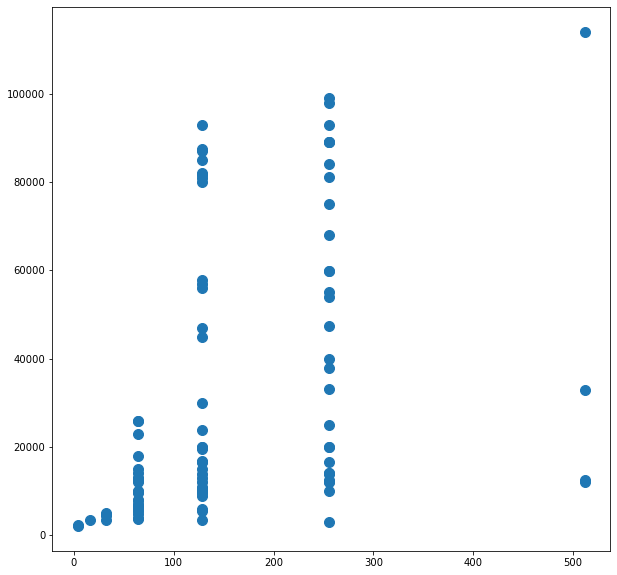

In [6]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
ax.scatter(data["memory"], data["price"], s = 100)
plt.show()

Предсказанная цена телефона по Памяти: 28206.937899879107


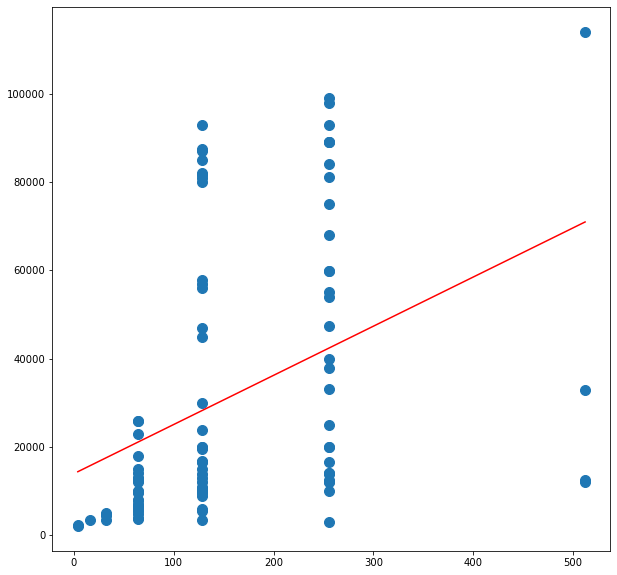

In [51]:
# Обучение модели регрессии
X = data[["memory"]]
Y = data["price"]
reg = LinearRegression().fit(X,Y)
[b] = reg.coef_
a = reg.intercept_
def reg_prediction(memory):
    return a + b * memory
reg_prediction(X.memory[0])
print("Предсказанная цена телефона по Памяти:",reg.predict(X[0:1])[0])

fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()
# помещаем точки на график
ax.scatter(data["memory"], data["price"], s=100)
# помещаем предсказания
ax.plot([X.memory.min(), X.memory.max()], [reg_prediction(X.memory.min()), reg_prediction(X.memory.max())], c="red")
# отображаем картинку
plt.show()

Предсказанная цена телефона по Оперативной памяти: 36733.684740217956


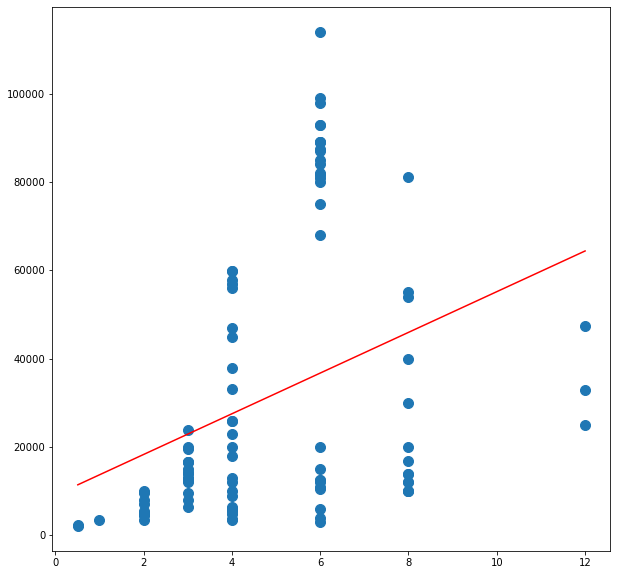

In [52]:
X = data[["ram"]]
Y = data["price"]
reg = LinearRegression().fit(X,Y)
[b] = reg.coef_
a = reg.intercept_
def reg_prediction(ram):
    return a + b * ram
reg_prediction(X.ram[0])
print("Предсказанная цена телефона по Оперативной памяти:",reg.predict(X[0:1])[0])

fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()
# помещаем точки на график
ax.scatter(data["ram"], data["price"], s=100)
# помещаем предсказания
ax.plot([X.ram.min(), X.ram.max()], [reg_prediction(X.ram.min()), reg_prediction(X.ram.max())], c="red")
# отображаем картинку
plt.show()

Предсказанная цена телефона по Памяти и Оперативной памяти: 31890.080822972744


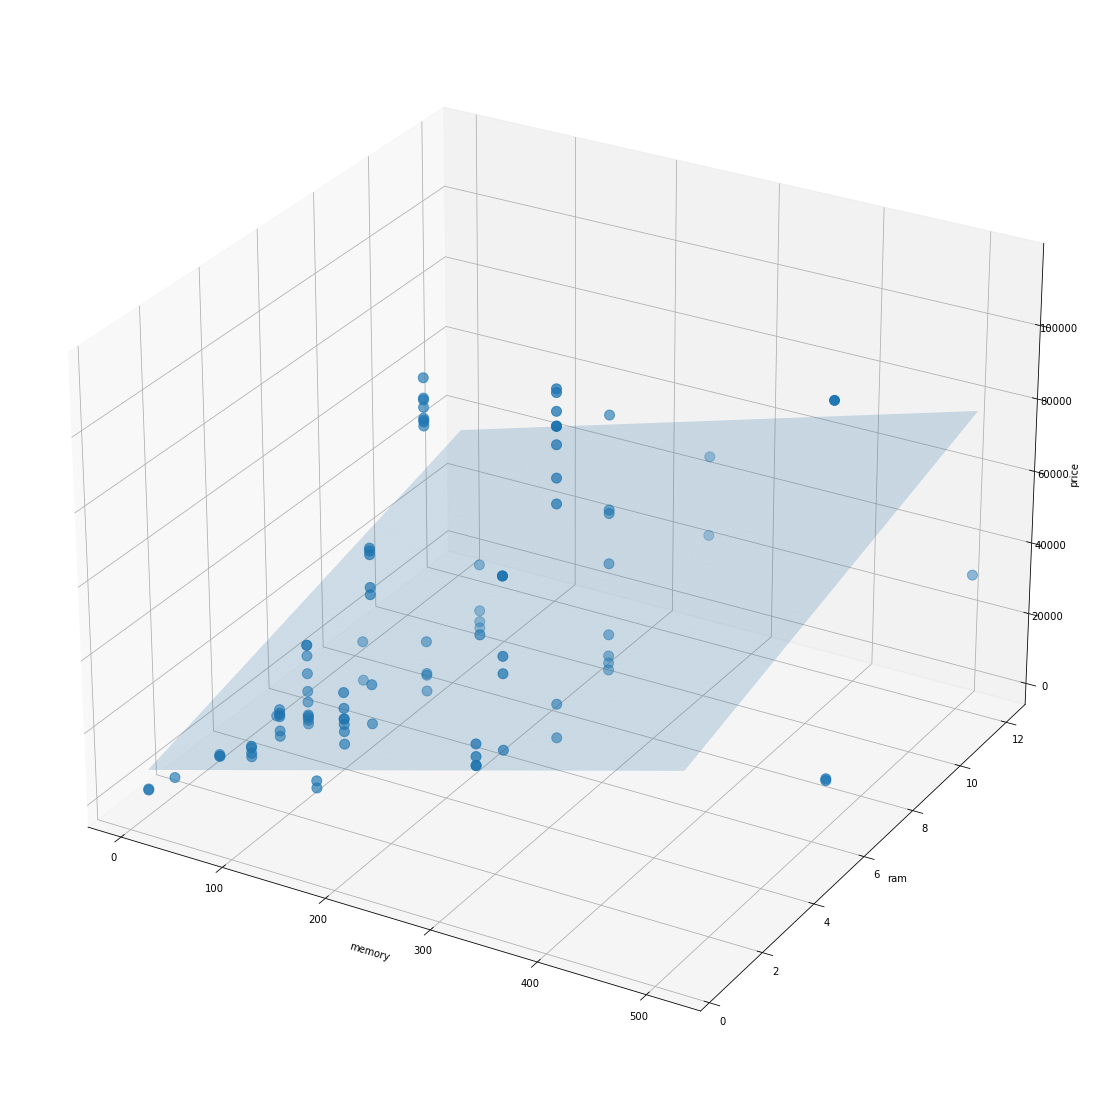

In [57]:
X = data[["memory", "ram"]]
Y = data["price"]
reg = LinearRegression().fit(X,Y)
[b1, b2] = reg.coef_
a = reg.intercept_
def reg_prediction(memory, ram):
    return a + b1 * memory + b2 * ram
reg_prediction(X.memory[0], X.ram[0])
print("Предсказанная цена телефона по Памяти и Оперативной памяти:", reg.predict(X[0:1])[0])

d1, d2 = list(), list()
for x in np.linspace(min(data["memory"]), max(data["memory"]), 100):
    for y in np.linspace(min(data["ram"]), max(data["ram"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")

ax.scatter(data["memory"], data["ram"], data["price"], s=100)

ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel("memory")
ax.set_ylabel("ram")
ax.set_zlabel("price")

ax.elev = 27
plt.show()

In [6]:
# Обучение модели классификации
X = data[["memory", "ram"]]
y = data["sys"]
c1 = DecisionTreeClassifier().fit(X, y)
print(export_text(c1))

|--- feature_1 <= 7.00
|   |--- feature_0 <= 96.00
|   |   |--- feature_0 <= 48.00
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_1 <= 0.76
|   |   |   |   |   |--- class: android
|   |   |   |   |--- feature_1 >  0.76
|   |   |   |   |   |--- class: ios
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- class: android
|   |   |--- feature_0 >  48.00
|   |   |   |--- feature_1 <= 3.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- class: ios
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- class: ios
|   |   |   |--- feature_1 >  3.50
|   |   |   |   |--- feature_1 <= 5.00
|   |   |   |   |   |--- class: android
|   |   |   |   |--- feature_1 >  5.00
|   |   |   |   |   |--- class: android
|   |--- feature_0 >  96.00
|   |   |--- feature_0 <= 192.00
|   |   |   |--- feature_1 <= 5.00
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- class: android
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- class: i

In [7]:
c1.predict(X[7:8])[0], y[7]

('ios', 'ios')

In [8]:
# Обучение модели кластеризации
X = data[["memory", "ram"]]
clust = KMeans(n_clusters=2).fit(X)
[c1, c2] = clust.cluster_centers_
clust.cluster_centers_

array([[286.11764706,   6.35294118],
       [ 93.375     ,   4.17225   ]])

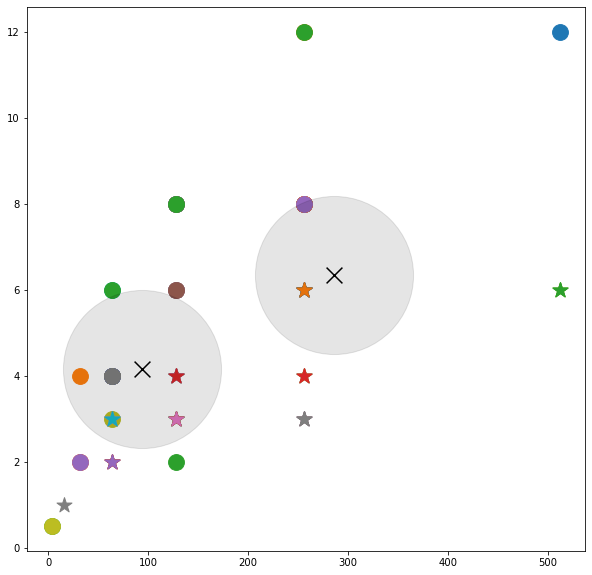

In [9]:
fig = plt.figure(figsize=(10, 10))

markers = {"android": "o", "ios": "*"}
for d1, d2, l in zip(data.memory, data.ram, data.sys):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.show()